
Himani Parikh - 1322085

Deep Learning Homework 3 (50 points)

Due Date: Dec-13

In this problem, you are asked to train and test the LeNet
for entire CIFAR-10 colorful image dataset. You need to modify LeNet
for this problem.

Performance requirement and submission are detailed
as follows:

– The test accuracy should achieve above 50%

– You need to submit three results:

1. network without dropout/batch normalization
2. network with one additional dropout layer
3. network with one additional batch normalization

Compare the results in your submission.
– What to submit: Submission should include your source codes and
screen snapshot of your train and test accuracy, plus the training time

In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

***Load the cifar10 dataset***


---



In [2]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)

170498071/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 1)


In [3]:
print(x_train[0].shape)

(32, 32, 3)


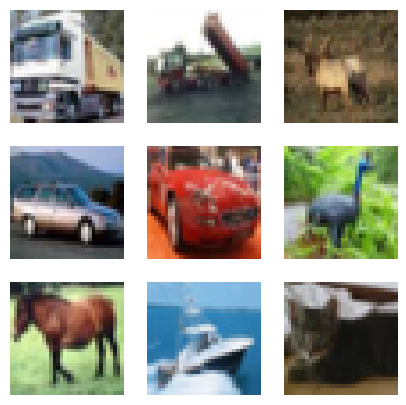

In [4]:
plt.figure(figsize=(5,5))
for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.axis('off')
  plt.imshow(x_train[i])
plt.show()

In [5]:
x_train, x_test = x_train/float(255), x_test/float(255)
x_train -= np.mean(x_train)
x_test -= np.mean(x_test)

ytrain=tf.keras.utils.to_categorical(y_train)
ytest=tf.keras.utils.to_categorical(y_test)

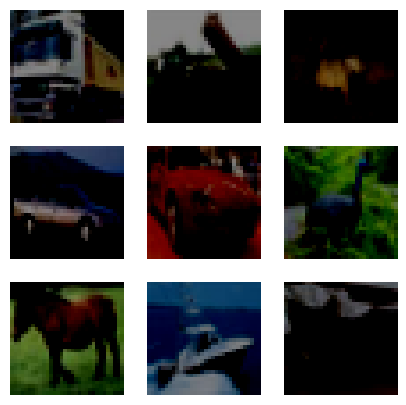

In [6]:
plt.figure(figsize=(5,5))
for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.axis('off')
  plt.imshow(x_train[i])
plt.show()

***1. Network without dropout/batch normalization.***

---



In [7]:
model = tf.keras.models.Sequential()

#conv1
model.add(tf.keras.layers.Conv2D(filters = 6, kernel_size=(5,5), padding= 'valid',
                                 strides = (1,1), activation='tanh', input_shape=(32,32,3)))
#avgpooling1
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

#conv2
model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (5,5), padding= 'valid', strides = (1,1), activation='tanh'))

##avgpooling2
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

#conv3
model.add(tf.keras.layers.Conv2D(filters = 120, kernel_size = (5,5), padding= 'valid', strides = (1,1), activation='tanh'))

#fully-connected network
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.004, momentum=0.9),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [8]:
model_history = model.fit(x_train, y_train, batch_size = 128, epochs=10)
print("The model has successfully trained")

model.save('sample.model')

Epoch 1/10
391/391 [==============================] - 31s 78ms/step - loss: 1.8125 - accuracy: 0.3577
Epoch 2/10
391/391 [==============================] - 32s 82ms/step - loss: 1.5733 - accuracy: 0.4410
Epoch 3/10
391/391 [==============================] - 31s 78ms/step - loss: 1.4151 - accuracy: 0.4942
Epoch 4/10
391/391 [==============================] - 32s 82ms/step - loss: 1.3283 - accuracy: 0.5233
Epoch 5/10
391/391 [==============================] - 34s 88ms/step - loss: 1.2670 - accuracy: 0.5478
Epoch 6/10
391/391 [==============================] - 30s 78ms/step - loss: 1.2171 - accuracy: 0.5648
Epoch 7/10
391/391 [==============================] - 31s 78ms/step - loss: 1.1829 - accuracy: 0.5784
Epoch 8/10
391/391 [==============================] - 30s 78ms/step - loss: 1.1449 - accuracy: 0.5928
Epoch 9/10
391/391 [==============================] - 42s 109ms/step - loss: 1.1133 - accuracy: 0.6055
Epoch 10/10
391/391 [==============================] - 32s 82ms/step - loss: 1.08

In [9]:
s_model = tf.keras.models.load_model('sample.model')
loss, accuracy = s_model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', np.round((accuracy)*100, 2))

313/313 [==============================] - 3s 10ms/step - loss: 1.2413 - accuracy: 0.5620
Test loss: 1.2413289546966553
Test accuracy: 56.2


<function matplotlib.pyplot.show(close=None, block=None)>

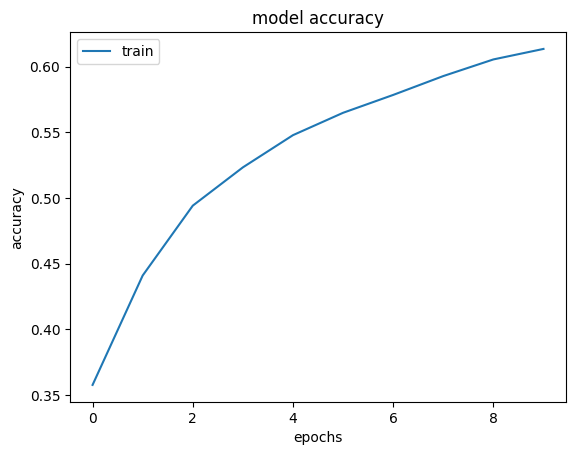

In [10]:
plt.plot(model_history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'], loc = 'upper left')
plt.show

***2. Network with one additional dropout layer***

---



In [11]:
model = tf.keras.models.Sequential()

#conv1
model.add(tf.keras.layers.Conv2D(filters = 6, kernel_size=(5,5), padding= 'valid',
                                 strides = (1,1), activation='tanh', input_shape=(32,32,3)))
#avgpooling1
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

#conv2
model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (5,5), padding= 'valid', strides = (1,1), activation='tanh'))

##avgpooling2
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

#conv3
model.add(tf.keras.layers.Conv2D(filters = 120, kernel_size = (5,5), padding= 'valid', strides = (1,1), activation='tanh'))

#fully-connected network
model.add(tf.keras.layers.Flatten())

#dropout
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

In [12]:
model_hist = model.fit(x_train, y_train, batch_size = 128, epochs=10)
print("The model has successfully trained")

model.save('sample1.model')

Epoch 1/10
391/391 [==============================] - 40s 101ms/step - loss: 1.8272 - accuracy: 0.3512
Epoch 2/10
391/391 [==============================] - 31s 79ms/step - loss: 1.6099 - accuracy: 0.4272
Epoch 3/10
391/391 [==============================] - 35s 89ms/step - loss: 1.4950 - accuracy: 0.4643
Epoch 4/10
391/391 [==============================] - 34s 86ms/step - loss: 1.4271 - accuracy: 0.4880
Epoch 5/10
391/391 [==============================] - 31s 79ms/step - loss: 1.3770 - accuracy: 0.5070
Epoch 6/10
391/391 [==============================] - 31s 80ms/step - loss: 1.3273 - accuracy: 0.5252
Epoch 7/10
391/391 [==============================] - 32s 82ms/step - loss: 1.3032 - accuracy: 0.5357
Epoch 8/10
391/391 [==============================] - 31s 78ms/step - loss: 1.2799 - accuracy: 0.5447
Epoch 9/10
391/391 [==============================] - 31s 79ms/step - loss: 1.2592 - accuracy: 0.5504
Epoch 10/10
391/391 [==============================] - 31s 79ms/step - loss: 1.24

In [13]:
s2_model = tf.keras.models.load_model('sample1.model')
loss, accuracy = s2_model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', np.round((accuracy)*100, 2))

313/313 [==============================] - 4s 12ms/step - loss: 1.2556 - accuracy: 0.5537
Test loss: 1.2556090354919434
Test accuracy: 55.37


<function matplotlib.pyplot.show(close=None, block=None)>

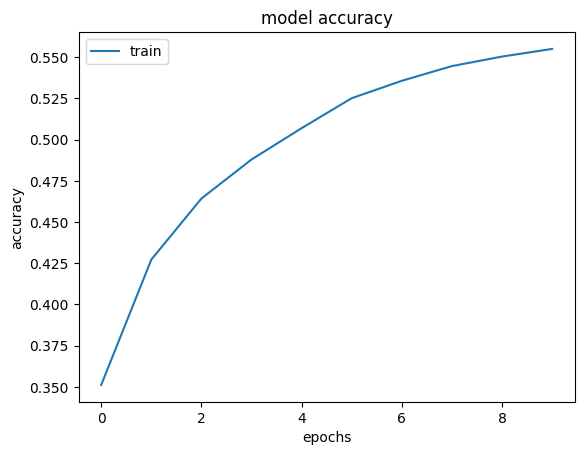

In [14]:
plt.plot(model_hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'], loc = 'upper left')
plt.show

***3. Network with one additional batch normalization***


---



In [15]:
model = tf.keras.models.Sequential()

#conv1
model.add(tf.keras.layers.Conv2D(filters = 6, kernel_size=(5,5), padding= 'valid',
                                 strides = (1,1), activation='tanh', input_shape=(32,32,3)))

#avgpooling1
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

#conv2
model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (5,5), padding= 'valid', strides = (1,1), activation='tanh'))

##avgpooling2
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

#conv3
model.add(tf.keras.layers.Conv2D(filters = 120, kernel_size = (5,5), padding= 'valid', strides = (1,1), activation='tanh'))

#BatchNormalization
model.add(tf.keras.layers.BatchNormalization())

#fully-connected network
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_4 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 batch_normalization (Batch  (None, 1, 1, 120)        

In [16]:
model_his = model.fit(x_train, y_train, batch_size = 128, epochs=10)
print("The model has successfully trained")

model.save('sample2.model')

Epoch 1/10
391/391 [==============================] - 32s 80ms/step - loss: 1.7587 - accuracy: 0.3788
Epoch 2/10
391/391 [==============================] - 32s 83ms/step - loss: 1.4361 - accuracy: 0.4850
Epoch 3/10
391/391 [==============================] - 31s 79ms/step - loss: 1.2942 - accuracy: 0.5405
Epoch 4/10
391/391 [==============================] - 30s 78ms/step - loss: 1.2129 - accuracy: 0.5684
Epoch 5/10
391/391 [==============================] - 30s 78ms/step - loss: 1.1527 - accuracy: 0.5906
Epoch 6/10
391/391 [==============================] - 31s 80ms/step - loss: 1.1039 - accuracy: 0.6101
Epoch 7/10
391/391 [==============================] - 31s 79ms/step - loss: 1.0617 - accuracy: 0.6240
Epoch 8/10
391/391 [==============================] - 32s 81ms/step - loss: 1.0269 - accuracy: 0.6353
Epoch 9/10
391/391 [==============================] - 31s 79ms/step - loss: 0.9923 - accuracy: 0.6499
Epoch 10/10
391/391 [==============================] - 34s 87ms/step - loss: 0.968

In [17]:
s3_model = tf.keras.models.load_model('sample2.model')
loss, accuracy = s3_model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', np.round((accuracy)*100, 2))

313/313 [==============================] - 3s 9ms/step - loss: 1.2644 - accuracy: 0.5730
Test loss: 1.2643855810165405
Test accuracy: 57.3


<function matplotlib.pyplot.show(close=None, block=None)>

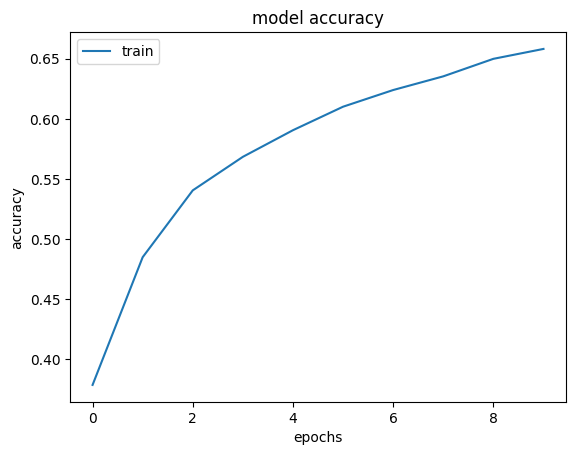

In [18]:
plt.plot(model_his.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'], loc = 'upper left')
plt.show